# Satellite Imaging Classification

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import image_dataset_from_directory

In [14]:
source = "Archive Satellite/data/"
batch_size = 32
height = 72
width = 128

## 2. Loading and Splitting

In [16]:
#Loading the dataset and splitting into training and validation sets
train = tf.keras.utils.image_dataset_from_directory(
    source,
    validation_split=0.2,
    subset="training",
    seed=1234,
    image_size=(height, width),
    batch_size=batch_size)

val = tf.keras.utils.image_dataset_from_directory(
    source,
    validation_split=0.2,
    subset="validation",
    seed=1234,
    image_size=(height, width),
    batch_size=batch_size)

Found 5631 files belonging to 4 classes.
Using 4505 files for training.
Found 5631 files belonging to 4 classes.
Using 1126 files for validation.


## 3. Displaying Samples

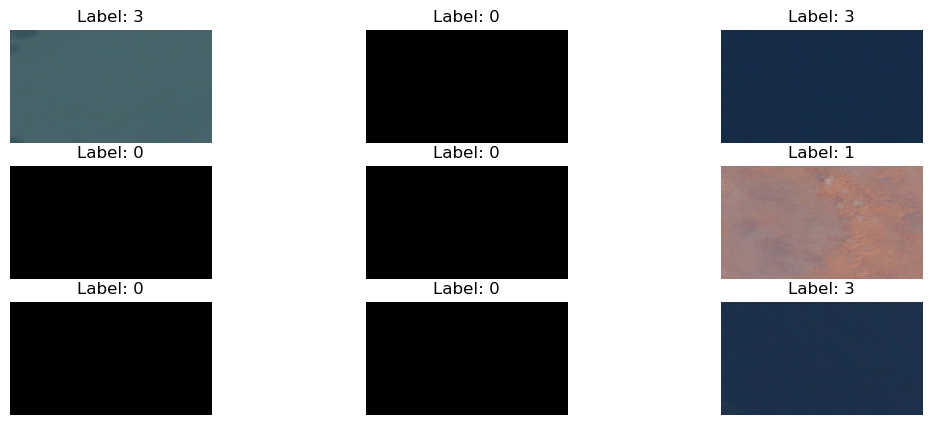

In [17]:
# Print the first images with their labels
plt.figure(figsize=(13, 5))
for i, (images, labels) in enumerate(train.take(1)):
    for j in range(9):
        ax = plt.subplot(3, 3, j + 1)
        plt.imshow(images[j].numpy().astype("uint8"))
        plt.title(f"Label: {labels[j].numpy()}")
        plt.axis("off")
plt.show()

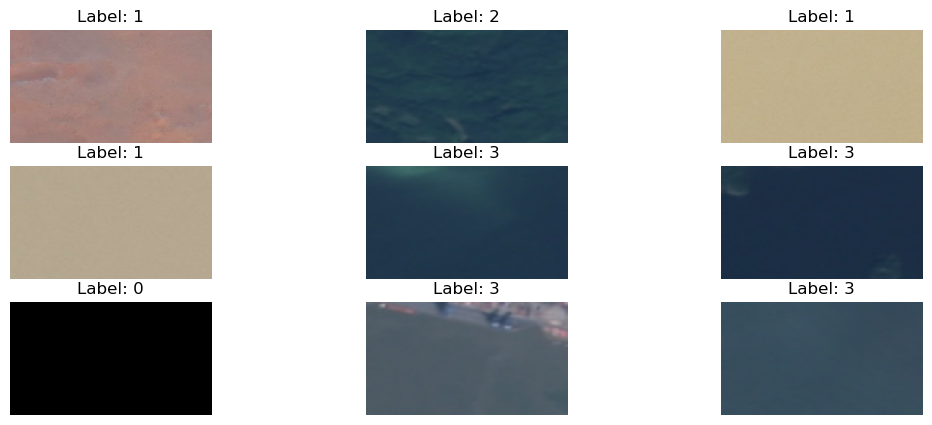

In [18]:
plt.figure(figsize=(13, 5))
for i, (images, labels) in enumerate(val.take(1)):
    for j in range(9):
        ax = plt.subplot(3, 3, j + 1)
        plt.imshow(images[j].numpy().astype("uint8"))
        plt.title(f"Label: {labels[j].numpy()}")
        plt.axis("off")
plt.show()

## 4. Setting Classes

In [19]:
amount = len(set(label for _, labels in train for label in labels.numpy()))
print(f"There are {amount} different Classes")

There are 4 different Classes


In [20]:
classes = {
    1: "cloudy",
    2: "desert",
    3: "water",
    4: "green_area"
}

## 5. Building Model

In [21]:
# CNN model architecture
# The first layer has 16 filters, kernel size equal to 3
# The max pooling layer allows to reduce the spatial dimensions
# The 2D feature flattened to 1D vector allows to prepare for the fully connected layer
# The fully connected layer has 128 neurons
# The output layer has 4 neurons (because there are 4 different classes)
model = Sequential([
    layers.Input(shape=(height, width, 3)),
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(amount)
])

In [22]:
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
epochs = 20
history = model.fit(
    train,
    validation_data=val,
    epochs=epochs
)

Epoch 1/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.7292 - loss: 0.5948 - val_accuracy: 0.8961 - val_loss: 0.2197
Epoch 2/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9036 - loss: 0.2125 - val_accuracy: 0.8934 - val_loss: 0.2179
Epoch 3/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9187 - loss: 0.1712 - val_accuracy: 0.9334 - val_loss: 0.2286
Epoch 4/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9072 - loss: 0.2000 - val_accuracy: 0.9254 - val_loss: 0.1736
Epoch 5/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9289 - loss: 0.1566 - val_accuracy: 0.9361 - val_loss: 0.1579
Epoch 6/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9276 - loss: 0.1515 - val_accuracy: 0.9236 - val_loss: 0.1700
Epoch 7/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9471 - loss: 0.1229 - val_accuracy: 0.9369 - val_loss: 0.1541
Epoch 8/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9469 - loss: 0.1221 - val_accu

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 72, 128, 3)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 72, 128, 16)    │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 36, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 36, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 18, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 18, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 9, 16, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,611,630 (13.78 MB)

 Trainable params: 1,203,876 (4.59 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,407,754 (9.18 MB)

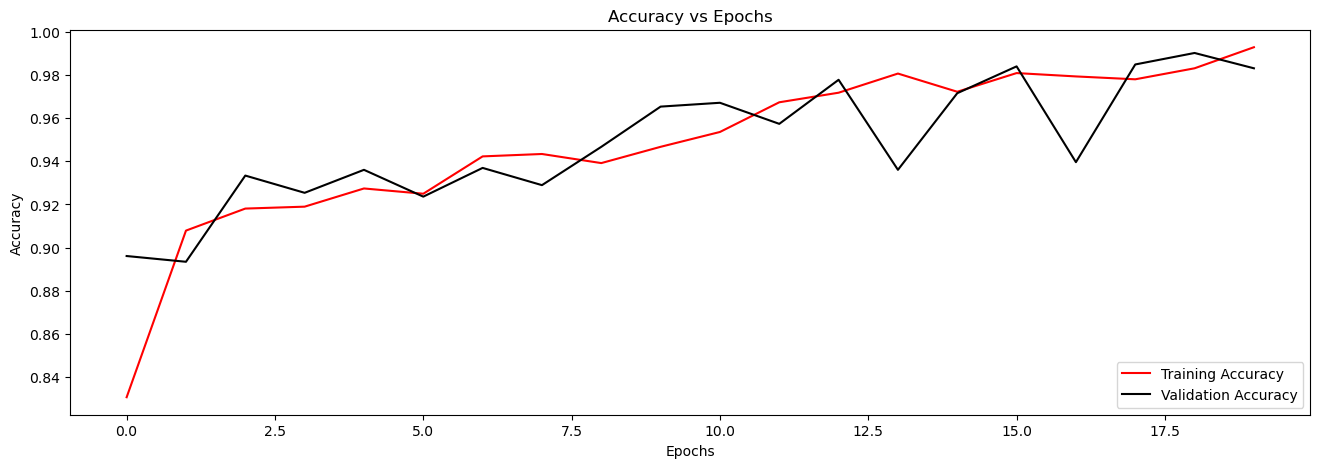

In [26]:
# accuracy and loss
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(16, 5))
plt.plot(epochs_range, accuracy, label='Training Accuracy', color='red')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy', color='black')
plt.legend(loc='lower right')
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

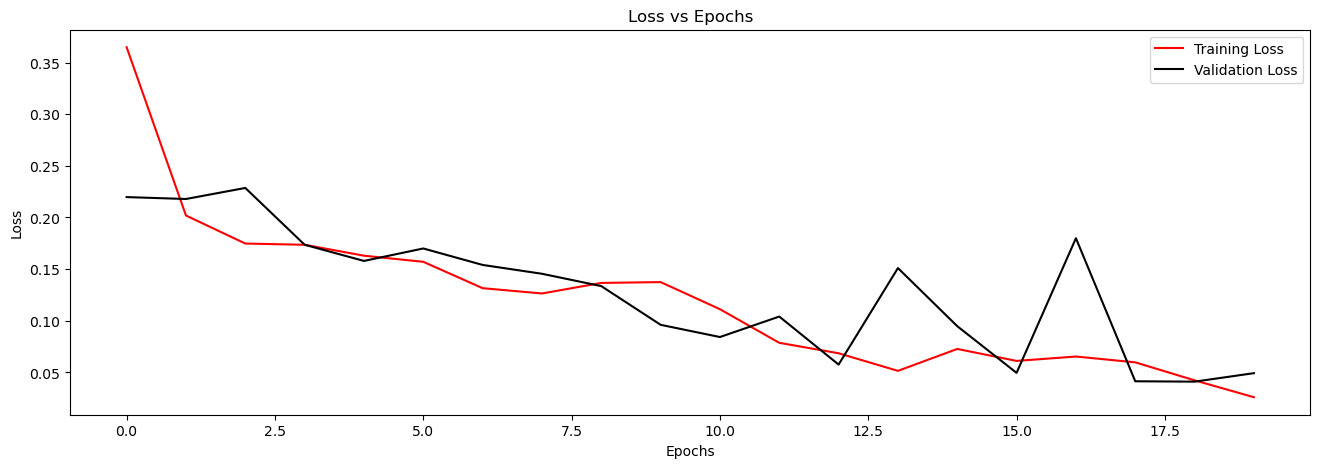

In [27]:
plt.figure(figsize=(16, 5))
plt.plot(epochs_range, loss, label='Training Loss', color='red')
plt.plot(epochs_range, val_loss, label='Validation Loss', color='black')
plt.legend(loc='upper right')
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

## 6. Displaying 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


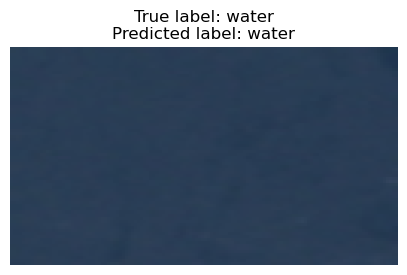

In [41]:
# Predicting two image from the validation dataset
plt.figure(figsize=(5, 3))  
for images, labels in val.take(1):
    sample_image = images[1]
    true_label = labels[1]

    sample_image = tf.expand_dims(sample_image, axis=0)

    predictions = model.predict(sample_image)

    predicted_class_index = tf.argmax(predictions, axis=1).numpy()[0]
    predicted_class = classes[predicted_class_index]

    plt.imshow(sample_image[0].numpy().astype("uint8"))
    plt.title(f"True label: {classes[true_label.numpy()]}\nPredicted label: {predicted_class}")
    plt.axis('off')

plt.show()

In [44]:
#evaluate model validation dataset
test_lost, test_accuracy = model.evaluate(val)

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9876 - loss: 0.0372


In [45]:
#evaluate model training dataset
train_lost, train_accuracy = model.evaluate(train)

141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9893 - loss: 0.0288


In [47]:
print(f"Test Accuracy : {test_accuracy * 100:.2f}%")
print(f"Train Accuracy : {train_accuracy * 100:.2f}%")
print(f"Test Lost : {test_lost * 100:.2f}%")
print(f"Train Lost : {train_lost * 100:.2f}%")

Test Accuracy : 98.31%
Train Accuracy : 98.91%
Test Lost : 4.93%
Train Lost : 2.82%
